# Majors and Employment
"Working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors)."

The data will be used to answer the following questions:
- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

## Part I - Introduction

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

recent_grads=pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
recent_grads.describe()


#https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
raw_data_count=len(recent_grads.index)
print(raw_data_count)
#recent_grads.shape
recent_grads=recent_grads.dropna()
cleaned_data_count=len(recent_grads.index)
print(raw_data_count,cleaned_data_count,raw_data_count-cleaned_data_count)

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


## Part II - Pandas, Scatter Plots

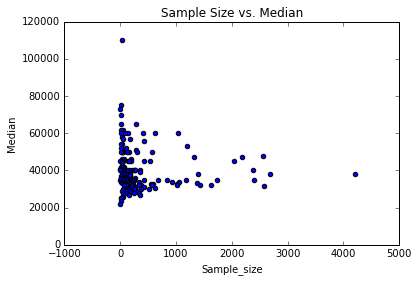

In [3]:
ax1=recent_grads.plot(x='Sample_size',y='Median',kind='scatter',\
                      title='Sample Size vs. Median')

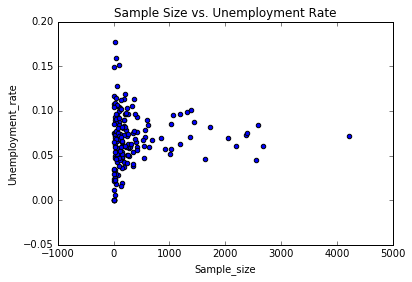

In [4]:
ax2=recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter',\
                     title='Sample Size vs. Unemployment Rate')

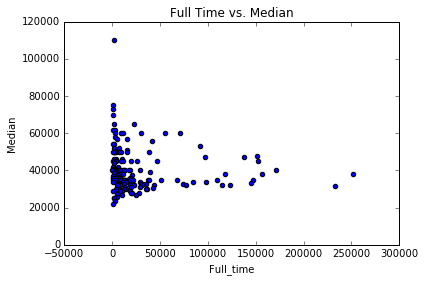

In [5]:
ax3=recent_grads.plot(x='Full_time',y='Median',kind='scatter',\
                     title='Full Time vs. Median')

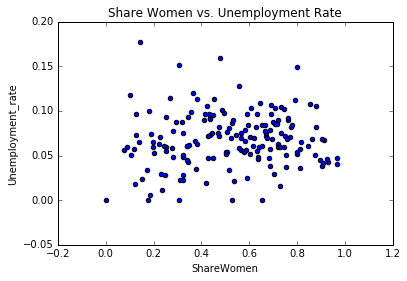

In [6]:
ax4=recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter',\
                     title='Share Women vs. Unemployment Rate')

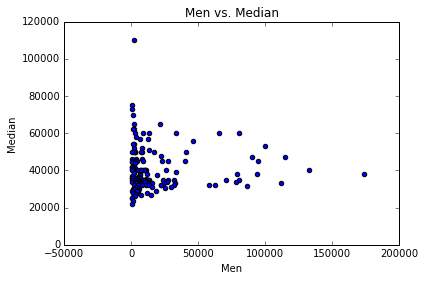

In [7]:
ax5=recent_grads.plot(x='Men',y='Median',kind='scatter',\
                     title='Men vs. Median')

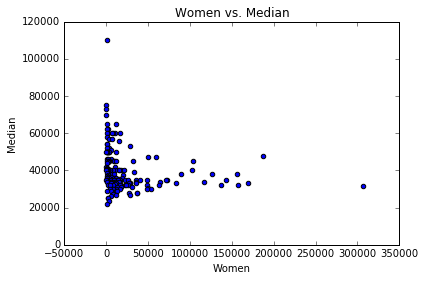

In [8]:
ax6=recent_grads.plot(x='Women',y='Median',kind='scatter',\
                     title='Women vs. Median')

### 1) Do students in more popular majors make more money?

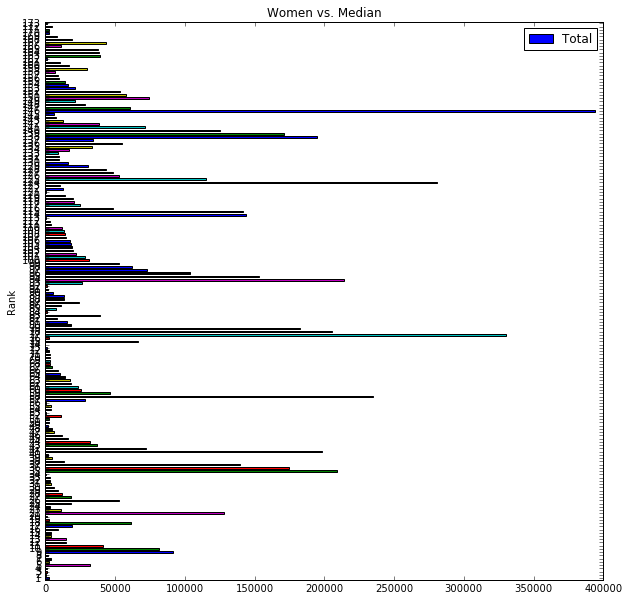

In [10]:
ax7=recent_grads.plot(x='Rank',y='Total',kind='barh',\
                     title='Women vs. Median',figsize=(10,10))

- From the plot above, one can see that the popular majors indicated by the 'Total' number of people in the major on the x-axis does not correspond to the 'Rank' which is the rank of the median earning for that major

### 2) Do students that major in subjects that were majority female make more money?

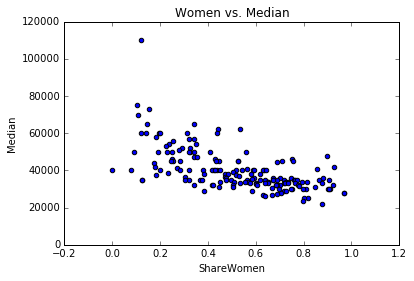

In [15]:
ax8=recent_grads.plot(x='ShareWomen',y='Median',kind='scatter',\
                     title='Women vs. Median')

- There seems to be a negative correlation between the number of women in the major and the median salary of that major. There seems to be a higher negative correlation between 0-40% and a weaker negative correlation from 40% to 100% women in the field

### 3) Is there any linke between the number of full-time employees and median salary

- In ax3 Full_time vs Median there appears that there is a weak negative correlation between the number of full-time employees and the median salary

## Part III - Pandas, Histograms

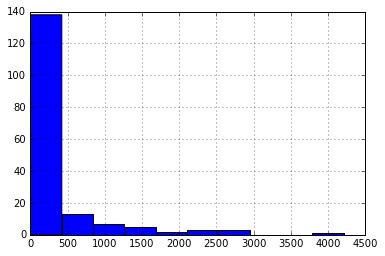

In [16]:
recent_grads['Sample_size'].hist()

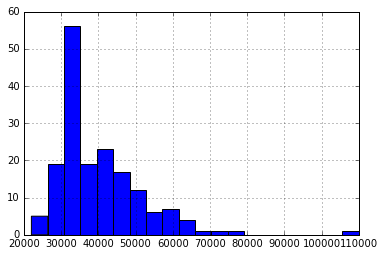

In [38]:
recent_grads['Median'].hist(bins=20)

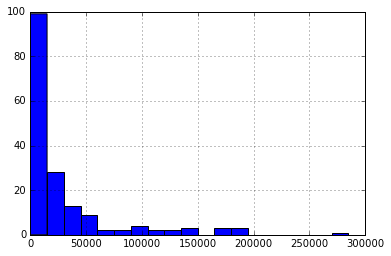

In [21]:
recent_grads['Employed'].hist(bins=20, range=(0,300000))

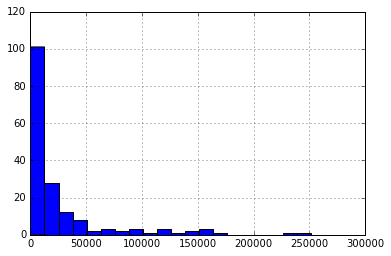

In [24]:
recent_grads['Full_time'].hist(bins=20)

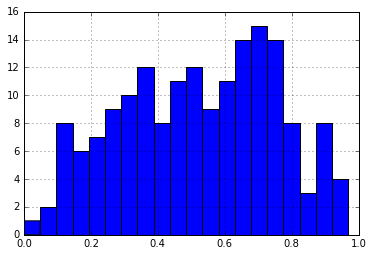

In [26]:
recent_grads['ShareWomen'].hist(bins=20)

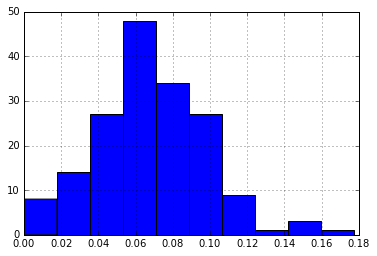

In [30]:
recent_grads['Unemployment_rate'].hist(bins=10)

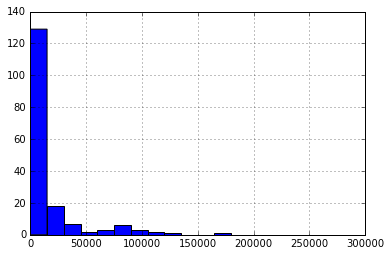

In [36]:
recent_grads['Men'].hist(bins=20,range=(0,300000))

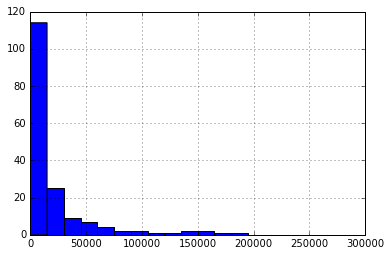

In [37]:
recent_grads['Women'].hist(bins=20,range=(0,300000))

### What percent of majors are predominantly male? Predonimantly female?

In [54]:
above50=recent_grads['ShareWomen']>0.5
perpredmen=above50.sum()/recent_grads.shape[0]*100
perpredwomen=100-perpredmen
print('percent predominantly male: '+str(round(perpredmen)))
print('percent predominantly female: '+str(round(perpredwomen)))

percent predominantly male: 56.0
percent predominantly female: 44.0


### What's the most common median salary range?

- \$30,000 - \$40,000

### Part IV - Pandas, Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fde173e80>,
      dtype=object)

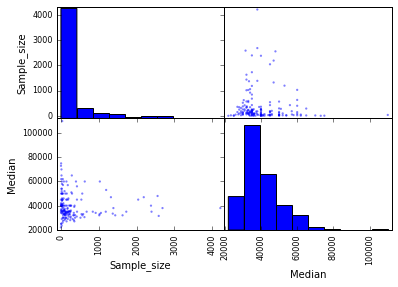

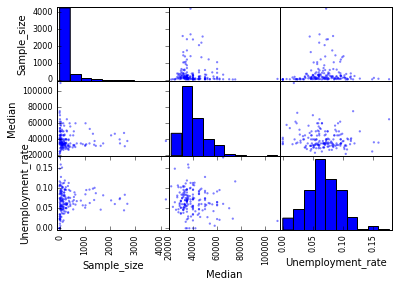

In [58]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size','Median']])
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']])

### Part V - Pandas, Bar Plots

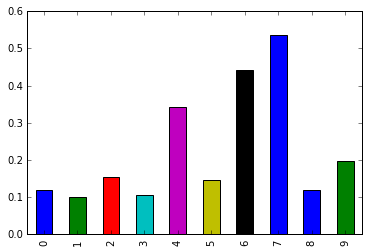

In [62]:
recent_grads[:10].plot.bar(y='ShareWomen',legend=False)

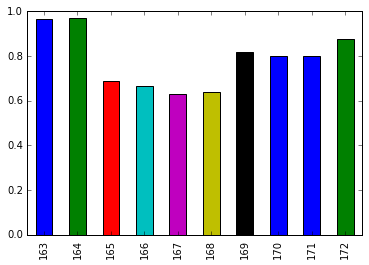

In [63]:
recent_grads[-10:].plot.bar(y='ShareWomen',legend=False)

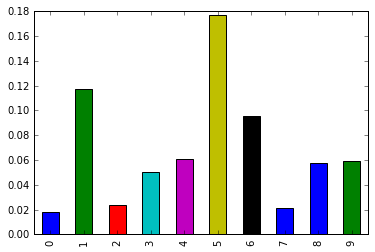

In [64]:
recent_grads[:10].plot.bar(y='Unemployment_rate',legend=False)

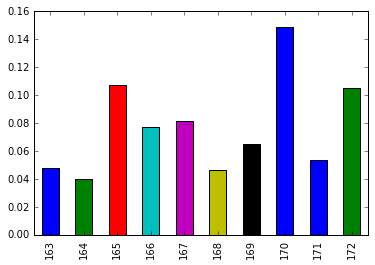

In [65]:
recent_grads[-10:].plot.bar(y='Unemployment_rate',legend=False)

- Further analysis can be performed using 'Next steps' directions